In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import sys


sys.path.append('../')
from data_prep import generate, draw, load

# Simulate a neuron image

1. Generate simulated swc_file data. This is a list of nodes, each node being a list:
[sample_idx, structure_id, x, y, z, radius, parent_id]

In [4]:
random_contrast=True
# rng = np.random.default_rng(7)
swc_list = generate.make_swc_list((101,101,101),
                        length=20,
                        step_size=3,
                        kappa=20.0,
                        uniform_len=False,
                        random_start=True,
                        rng=None,
                        num_branches=1) # make simulated neuron paths.
if random_contrast:
    color = np.random.rand(3)
    color /= np.linalg.norm(color)
    background = np.random.rand(3)
    background = background / np.linalg.norm(background) * 0.01

neuron_no_artifacts = draw.neuron_from_swc(swc_list,
                                width=3,
                                noise=0.0,
                                adjust=False,
                                neuron_color=None,
                                background_color=None,
                                random_brightness=False,
                                dropout=False,
                                binary=False) # Use simulated paths to draw the image.

neuron_with_artifacts = draw.neuron_from_swc(swc_list,
                                width=3,
                                noise=0.05,
                                adjust=False,
                                neuron_color=color,
                                background_color=background,
                                random_brightness=True,
                                dropout=True,
                                binary=False) # Use simulated paths to draw the image.



## 2. Draw the image.
    a. Without artifacts

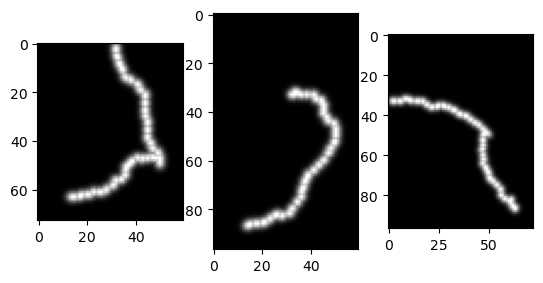

In [5]:
img = neuron_no_artifacts["image"].data.permute(1,2,3,0)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img.amax(0))
ax[1].imshow(img.amax(1))
ax[2].imshow(img.amax(2))    

plt.show()

    b. With artifacts

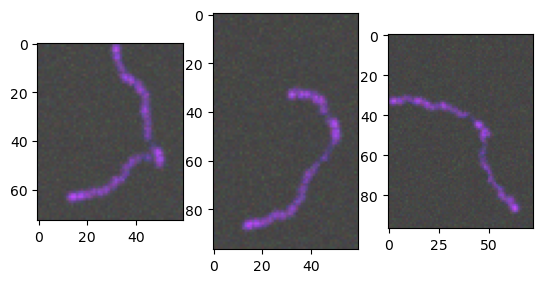

In [6]:
img = neuron_with_artifacts["image"].data.permute(1,2,3,0)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img.amax(0))
ax[1].imshow(img.amax(1))
ax[2].imshow(img.amax(2))    

plt.show()

## Load a real neuron as an swc file

In [7]:
labels_dir = "/home/brysongray/data/neuromorpho/"
files = [f for x in os.walk(labels_dir) for f in glob(os.path.join(x[0], '*.swc'))]


### Plot SWC raw data

In [9]:
f_idx = 1 

labels_file = files[f_idx]
swc_list = load.swc(labels_file)
sections, section_graph, branches, terminals, scale = load.parse_swc_list(swc_list, adjust=True)
# Create a DataFrame for plotting
data = []
# Iterate through the sections dictionary
for section_id, section_data in sections.items():
    # flatten the section into one list of consecutive points instead of segments (point pairs)
    for segment in section_data:
        point = segment[0] 
        data.append([section_id, point[0].item(), point[1].item(), point[2].item()])
df_sections = pd.DataFrame(data, columns=["section", "x", "y", "z"])

fig = px.line_3d(df_sections, x="x", y="y", z="z", color='section', )
fig.update_layout(scene_aspectmode='data')
fig.show()

loading file: /home/brysongray/data/neuromorpho/hart/CNG version/2016-10-27_541_mir-1_day_3_5.CNG.swc


### Show simulated image with artifacts

loading file: /home/brysongray/data/neuromorpho/hart/CNG version/2016-10-27_541_mir-1_day_3_5.CNG.swc


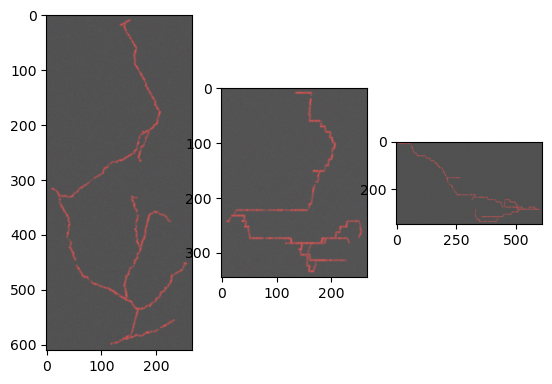

In [14]:
rng = np.random.default_rng()
color = np.array([1.0, 1.0, 1.0])
background = np.array([0., 0., 0.])
if random_contrast:
    color = rng.uniform(size=3)
    color /= np.linalg.norm(color)
    background = rng.uniform(size=3)
    background = background / np.linalg.norm(background) * 0.01
swc_data = draw.neuron_from_swc(swc_list,
                                width=3,
                                noise=0.05,
                                dropout=True,
                                adjust=True,
                                background_color=background,
                                neuron_color=color,
                                random_brightness=True,
                                binary=False,
                                rng=rng)

img = swc_data["image"].data.permute(1,2,3,0)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img.amax(0))
ax[1].imshow(img.amax(1))
ax[2].imshow(img.amax(2))

plt.show()